#  import modules

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#  import data

In [2]:
df = pd.read_csv("../raw_data/FM_data_21.csv", low_memory = False)

#  data cleaning

###  data exploration

In [3]:
df.head(20)

,Name,Club,Nat,Division,Position,Sec. Position,DoB,Age,Preferred Foot,Right Foot,...,Bal,Kic,Sta,Agi,Wor,Bra,Cmd,Fin,1v1,TRO
0,Kevin De Bruyne,Man City,BEL,English Premier Division ...,"M (RLC), AM (C)",M (RL),28/6/1991 (29 years old),29,Either,Very Strong,...,15,3,17,13,15,12,3,16,1,3
1,Harry Kane,Tottenham,ENG,English Premier Division ...,"AM (C), ST (C)",AM (C),28/7/1993 (27 years old),26,Either,Very Strong,...,13,3,17,12,18,16,2,19,3,3
2,Mohamed Salah,Liverpool,EGY,English Premier Division ...,"AM (RL), ST (C)",AM (L),15/6/1992 (28 years old),28,Left,Weak,...,18,1,14,16,15,11,3,18,3,2
3,Sadio Mané,Liverpool,SEN,English Premier Division ...,"AM (RL), ST (C)",ST (C),10/4/1992 (28 years old),28,Right,Very Strong,...,16,1,14,16,15,11,3,17,2,4
4,Son Heung-Min,Tottenham,KOR,English Premier Division ...,"M/AM (RL), ST (C)","M (RL), AM (R)",8/7/1992 (28 years old),28,Either,Very Strong,...,12,2,16,15,17,6,2,18,2,1
5,Raheem Sterling,Man City,ENG,English Premier Division ...,M/AM (RL),M (RL),8/12/1994 (25 years old),25,Right,Very Strong,...,15,3,17,19,16,11,3,13,3,3
6,Bernardo Silva,Man City,POR,English Premier Division ...,M/AM (RC),M (R),10/8/1994 (25 years old),25,Left,Weak,...,18,3,16,19,20,15,2,16,4,2
7,Roberto Firmino,Liverpool,BRA,English Premier Division ...,"AM (RLC), ST (C)",AM (RL),2/10/1991 (28 years old),28,Right,Very Strong,...,17,3,16,15,18,13,3,13,4,3
8,Virgil van Dijk,Liverpool,NED,English Premier Division ...,D (C),-,8/7/1991 (29 years old),29,Right,Very Strong,...,15,2,14,12,12,15,2,8,1,2
9,Bruno Fernandes,Man Utd,POR,English Premier Division ...,M/AM (C),-,8/9/1994 (25 years old),25,Right,Very Strong,...,14,2,18,15,17,17,2,15,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174574 entries, 0 to 174573
Data columns (total 66 columns):
 #   Column                                                Non-Null Count   Dtype 
---  ------                                                --------------   ----- 
 0    Name                                                 174574 non-null  object
 1    Club                                                 174574 non-null  object
 2    Nat                                                  174574 non-null  object
 3    Division                                             174574 non-null  object
 4    Position                                             174574 non-null  object
 5    Sec. Position                                        174574 non-null  object
 6    DoB                                                  174574 non-null  object
 7    Age                                                  174574 non-null  object
 8    Preferred Foot                                       

### basic cleaning

In [5]:
# cleaning column names

df.rename(str.lower, axis='columns', inplace = True)
df.rename(str.strip, axis='columns', inplace = True)

In [6]:
# cleaning columns with strings

df.name = df.name.str.strip()
df.division = df.division.str.strip()
df.nat = df.nat.str.strip()
df.club = df.club.str.strip()
df["preferred foot"] = df["preferred foot"].str.strip()
df["left foot"] = df["left foot"].str.strip()
df["right foot"] = df["right foot"].str.strip()

In [7]:
# Drop rows with empty string in the 'name' column
df = df[df["name"] != ""]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174324 entries, 0 to 174573
Data columns (total 66 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   name             174324 non-null  object
 1   club             174324 non-null  object
 2   nat              174324 non-null  object
 3   division         174324 non-null  object
 4   position         174324 non-null  object
 5   sec. position    174324 non-null  object
 6   dob              174324 non-null  object
 7   age              174324 non-null  object
 8   preferred foot   174324 non-null  object
 9   right foot       174324 non-null  object
 10  left foot        174324 non-null  object
 11  height           174324 non-null  object
 12  weight           174324 non-null  object
 13  at lge gls       174324 non-null  object
 14  at lge apps      174324 non-null  object
 15  wage             174324 non-null  object
 16  last trans. fee  174324 non-null  object
 17  value     

In [9]:
df = df.reset_index(drop=True)

In [10]:
# drop sec position column rc injury, at lge gls and at lge apps
df.drop(columns = ['sec. position', 'rc injury', 'at lge gls', 'at lge apps', 'nat .1'], inplace=True)

###  column definitions

In [11]:
column_definitions = {
    'name': 'Player name',
    'club': 'Current club',
    'nat': 'Nationality',
    'division': 'Club division',
    'position': 'Primary playing position',
    'sec. position': 'Secondary playing position',
    'dob': 'Date of birth',
    'age': 'Player age',
    'preferred foot': 'Preferred foot for playing',
    'right foot': 'Right foot proficiency',
    'left foot': 'Left foot proficiency',
    'height': 'Player height',
    'weight': 'Player weight',
    'at lge gls': 'Goals scored in the league',
    'at lge apps': 'Appearances in the league',
    'wage': 'Players wage',
    'last trans. fee': 'Last transfer fee paid',
    'value': 'Players market value',
    'rc injury': 'Recovery from injury',
    'agg': 'Aggression attribute',
    'jum': 'Jumping attribute',
    'pun': 'Punishment attribute',
    'nat .1': 'Nationality (duplicate)',
    'vis': 'Vision attribute',
    'l th': 'Long throwing attribute',
    'lon': 'Long shots attribute',
    'otb': 'Off the ball attribute',
    'tck': 'Tackling attribute',
    'tec': 'Technique attribute',
    'tea': 'Teamwork attribute',
    'cmp': 'Composure attribute',
    'fre': 'Free-kick taking attribute',
    'ref': 'Reflexes attribute',
    'pos': 'Positioning attribute',
    'pen': 'Penalties attribute',
    'pas': 'Passing attribute',
    'fla': 'Flair attribute',
    'ant': 'Anticipation attribute',
    'cro': 'Crossing attribute',
    'mar': 'Marking attribute',
    'ldr': 'Leadership attribute',
    'cor': 'Corner-taking attribute',
    'cnt': 'Concentration attribute',
    'det': 'Determination attribute',
    'dec': 'Decision-making attribute',
    'hea': 'Heading attribute',
    'fir': 'First touch attribute',
    'com': 'Communication attribute',
    'acc': 'Acceleration attribute',
    'pac': 'Pace attribute',
    'aer': 'Aerial ability attribute',
    'str': 'Strength attribute',
    'thr': 'Throw-in attribute',
    'han': 'Handling attribute',
    'ecc': 'Eccentricity attribute',
    'dri': 'Dribbling attribute',
    'bal': 'Balance attribute',
    'kic': 'Kicking attribute',
    'sta': 'Stamina attribute',
    'agi': 'Agility attribute',
    'wor': 'Work rate attribute',
    'bra': 'Bravery attribute',
    'cmd': 'Command of area attribute',
    'fin': 'Finishing attribute',
    '1v1': 'One-on-one ability attribute',
    'tro': 'Traits attribute'
}

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174324 entries, 0 to 174323
Data columns (total 61 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   name             174324 non-null  object
 1   club             174324 non-null  object
 2   nat              174324 non-null  object
 3   division         174324 non-null  object
 4   position         174324 non-null  object
 5   dob              174324 non-null  object
 6   age              174324 non-null  object
 7   preferred foot   174324 non-null  object
 8   right foot       174324 non-null  object
 9   left foot        174324 non-null  object
 10  height           174324 non-null  object
 11  weight           174324 non-null  object
 12  wage             174324 non-null  object
 13  last trans. fee  174324 non-null  object
 14  value            174324 non-null  object
 15  agg              174324 non-null  object
 16  jum              174324 non-null  object
 17  pun       

###  classing positions

In [13]:
# copy position column to main_position
df["main_position"] = df.position

# removing the spaces in the string
df.main_position = df.main_position.str.strip().str.replace(',\s*', ',')
 
# making a list out of all the positions
df.main_position = df.main_position.str.split(',')

# peek
df.main_position.head()

/var/folders/pv/hj9fs4fx3fn0k6t5l6qmlh6m0000gn/T/ipykernel_88177/2647964038.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.main_position = df.main_position.str.strip().str.replace(',\s*', ',')


0      [M (RLC), AM (C)]
1       [AM (C), ST (C)]
2      [AM (RL), ST (C)]
3      [AM (RL), ST (C)]
4    [M/AM (RL), ST (C)]
Name: main_position, dtype: object

In [14]:
# dictionary for every position class
football_positions = {
    'goalkeeper': ['GK'],
    'centerback': ['D (C)', 'D (RC)', 'D (LC)', 'D (RLC)', 'D/M (C)'],
    'fullback': ['D/WB/AM (RL)','D/WB/AM (L)','WB/M/AM (L)','WB/M (R)','WB/M/AM (R)','D/WB/M/AM (R)','D/WB/M/AM (L)','D/WB/M (R)','WB (R)','WB/M/AM (RL)','D/WB/M (RL)','D/WB (RL)','WB (L)','D/WB/AM (R)','D/WB (L)','WB (RL)','D/WB (R)','D (RL)', 'D (L)', 'D (R)', 'D (L)', 'D/AM (R)', 'D/AM (L)', 'D/AM (RL)', 'D/WB/M (L)', 'D/M/AM (RL)', 'D/M/AM (L)', 'D/M (R)', 'D/M (L)', 'D/AM (R)', 'WB/M (L)', 'D/M/AM (R)', 'D/WB/M/AM (RL)', 'D/M (R)', 'D/M (L)', 'D/AM (R)', 'WB/AM (L)', 'D/AM (L)', 'D/AM (RL)', 'WB/M (RL)', 'WB/AM (R)', 'D/M (RL)', 'WB/AM (RL)'],
    'midfielder': ['D/M (RC)','D/M/AM (C)','D/AM (C)','D/M (LC)','D/M/AM (LC)','AM (LC)','AM (RLC)','AM (RC)','AM (C)','M (RLC)','M (C)', 'M (LC)', 'M (RC)', 'DM', 'M/AM (C)', 'M/AM (LC)', 'M/AM (RC)', 'M/AM (RLC)'],
    'winger': ['AM (RL)','M (RL)', 'M (R)', 'M (L)', 'M/AM (R)', 'M/AM (L)', 'M/AM (RL)', 'AM (L)', 'AM (R)'],
    'striker': ['ST (C)'],
    "no_position": [""]
}
# making the map with the football positions dictionary
positions_map = {}

for main_position, positions_list in football_positions.items():
    for position in positions_list:
        positions_map[position] = main_position


# peek
positions_map

{'GK': 'goalkeeper',
 'D (C)': 'centerback',
 'D (RC)': 'centerback',
 'D (LC)': 'centerback',
 'D (RLC)': 'centerback',
 'D/M (C)': 'centerback',
 'D/WB/AM (RL)': 'fullback',
 'D/WB/AM (L)': 'fullback',
 'WB/M/AM (L)': 'fullback',
 'WB/M (R)': 'fullback',
 'WB/M/AM (R)': 'fullback',
 'D/WB/M/AM (R)': 'fullback',
 'D/WB/M/AM (L)': 'fullback',
 'D/WB/M (R)': 'fullback',
 'WB (R)': 'fullback',
 'WB/M/AM (RL)': 'fullback',
 'D/WB/M (RL)': 'fullback',
 'D/WB (RL)': 'fullback',
 'WB (L)': 'fullback',
 'D/WB/AM (R)': 'fullback',
 'D/WB (L)': 'fullback',
 'WB (RL)': 'fullback',
 'D/WB (R)': 'fullback',
 'D (RL)': 'fullback',
 'D (L)': 'fullback',
 'D (R)': 'fullback',
 'D/AM (R)': 'fullback',
 'D/AM (L)': 'fullback',
 'D/AM (RL)': 'fullback',
 'D/WB/M (L)': 'fullback',
 'D/M/AM (RL)': 'fullback',
 'D/M/AM (L)': 'fullback',
 'D/M (R)': 'fullback',
 'D/M (L)': 'fullback',
 'WB/M (L)': 'fullback',
 'D/M/AM (R)': 'fullback',
 'D/WB/M/AM (RL)': 'fullback',
 'WB/AM (L)': 'fullback',
 'WB/M (RL)': '

In [15]:
# Function to map positions in a list
def map_positions(position_list):
    return [positions_map[pos] for pos in position_list]

# Apply the mapping function to the 'position' column
df.main_position = df.main_position.apply(map_positions)

# peek
df.main_position.head()

0    [midfielder, midfielder]
1       [midfielder, striker]
2           [winger, striker]
3           [winger, striker]
4           [winger, striker]
Name: main_position, dtype: object

In [16]:
# Returns "striker" if it's in the list, otherwise returns the first position.
def select_main_position(positions):
    if positions == ["midfielder", "striker"]:
        return "striker"
    return positions[0]

# Applies the select_main_position function to the 'main_position' column in the DataFrame.
df.main_position = df.main_position.apply(select_main_position)

In [17]:
# peek
df.main_position.head(20)

0     midfielder
1        striker
2         winger
3         winger
4         winger
5         winger
6     midfielder
7        striker
8     centerback
9     midfielder
10    centerback
11    midfielder
12       striker
13    midfielder
14    centerback
15    midfielder
16      fullback
17    goalkeeper
18    midfielder
19    centerback
Name: main_position, dtype: object

###  changing the types of the features

#### defining regex 

In [18]:
def extract_numbers(input_string):
    # Use regular expression to extract numbers
    numbers = re.findall(r'\d+', input_string)
    
    # Join the numbers into a single string or convert to a list depending on your needs
    result = ''.join(numbers)  # If you want a single string
    # result = [int(num) for num in numbers]  # If you want a list of integers
    
    return result

# def extract_date(input_string):
#     # Use regular expression to extract the date
#     date_match = re.search(r'\b\d{1,2}/\d{1,2}/\d{4}\b', input_string)
#
#     if date_match:
#         return date_match.group()
#     else:
#         return None

def extract_amount(input_string):
    # Use regular expression to extract numeric values with optional K or M suffix
    match = re.search(r'(?i)([0-9,.]+)([km]?)', input_string)
    
    if match:
        value_str, suffix = match.groups()
        value = float(value_str.replace(',', '.'))

        if suffix.lower() == 'k':
            value *= 1e3
        elif suffix.lower() == 'm':
            value *= 1e6

        return value
    else:
        return None

#### converting columntypes

In [19]:
# applying regex to features with 'dirty' numbers

#df.dob = df.dob.apply(extract_date)
df.height = df.height.apply(extract_numbers)
df.weight = df.weight.apply(extract_numbers)
df.wage = df.wage.apply(extract_numbers)
df['last trans. fee'] = df['last trans. fee'].apply(extract_amount)
df.value = df.value.apply(extract_amount)

In [20]:
numerical_columns = ['age', 'height', 'weight', 'wage', 'last trans. fee', 'value',
                      'agg', 'jum', 'pun', 'vis', 'l th', 'lon', 'otb', 'tck', 'tec', 'tea',
                      'cmp', 'fre', 'ref', 'pos', 'pen', 'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det',
                      'dec', 'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc', 'dri', 'bal', 'kic',
                      'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1', 'tro']


In [21]:
# Convert numerical columns to float32, replacing non-convertible values with NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce').astype('float32')

# Convert 'dob' column to datetime
# df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

In [22]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174324 entries, 0 to 174323
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             174324 non-null  object 
 1   club             174324 non-null  object 
 2   nat              174324 non-null  object 
 3   division         174324 non-null  object 
 4   position         174324 non-null  object 
 5   dob              174324 non-null  object 
 6   age              174324 non-null  float32
 7   preferred foot   174324 non-null  object 
 8   right foot       174324 non-null  object 
 9   left foot        174324 non-null  object 
 10  height           174324 non-null  float32
 11  weight           174324 non-null  float32
 12  wage             127480 non-null  float32
 13  last trans. fee  58178 non-null   float32
 14  value            174324 non-null  float32
 15  agg              174324 non-null  float32
 16  jum              174324 non-null  floa

### onehotencode main position

In [23]:
df.head()

,name,club,nat,division,position,dob,age,preferred foot,right foot,left foot,...,kic,sta,agi,wor,bra,cmd,fin,1v1,tro,main_position
0,Kevin De Bruyne,Man City,BEL,English Premier Division,"M (RLC), AM (C)",28/6/1991 (29 years old),29.0,Either,Very Strong,Strong,...,3.0,17.0,13.0,15.0,12.0,3.0,16.0,1.0,3.0,midfielder
1,Harry Kane,Tottenham,ENG,English Premier Division,"AM (C), ST (C)",28/7/1993 (27 years old),26.0,Either,Very Strong,Very Strong,...,3.0,17.0,12.0,18.0,16.0,2.0,19.0,3.0,3.0,striker
2,Mohamed Salah,Liverpool,EGY,English Premier Division,"AM (RL), ST (C)",15/6/1992 (28 years old),28.0,Left,Weak,Very Strong,...,1.0,14.0,16.0,15.0,11.0,3.0,18.0,3.0,2.0,winger
3,Sadio Mané,Liverpool,SEN,English Premier Division,"AM (RL), ST (C)",10/4/1992 (28 years old),28.0,Right,Very Strong,Reasonable,...,1.0,14.0,16.0,15.0,11.0,3.0,17.0,2.0,4.0,winger
4,Son Heung-Min,Tottenham,KOR,English Premier Division,"M/AM (RL), ST (C)",8/7/1992 (28 years old),28.0,Either,Very Strong,Very Strong,...,2.0,16.0,15.0,17.0,6.0,2.0,18.0,2.0,1.0,winger


In [24]:
df = pd.get_dummies(df, columns=['main_position'], prefix="", prefix_sep="")

In [25]:
# peek
df.sample(5)

,name,club,nat,division,position,dob,age,preferred foot,right foot,left foot,...,cmd,fin,1v1,tro,centerback,fullback,goalkeeper,midfielder,striker,winger
147713,Riky Kayame,Persita,IDN,Indonesian League One,ST (C),21/9/1993 (26 years old),26.0,Right Only,Very Strong,Very Weak,...,1.0,12.0,3.0,3.0,0,0,0,0,1,0
88426,Lluís Tarrés,Almería,ESP,Spanish Second Division,GK,16/3/2001 (19 years old),19.0,Right,Very Strong,Reasonable,...,9.0,3.0,9.0,10.0,0,0,1,0,0,0
140075,Naldo,União Rondonópolis,BRA,Brazilian National Fourth Division,GK,11/1/1986 (34 years old),34.0,Right,Very Strong,Weak,...,12.0,2.0,6.0,13.0,0,0,1,0,0,0
93100,Gaël Gibert,Clermont,FRA,French National 3 - Auvergne Rhône Alpes,D (C),31/7/2000 (19 years old),19.0,Right,Very Strong,Weak,...,1.0,2.0,1.0,3.0,1,0,0,0,0,0
123576,Federico Crivelli,Temperley,ARG,Argentine Second Division,GK,28/1/1982 (38 years old),38.0,Right,Very Strong,Reasonable,...,12.0,2.0,13.0,14.0,0,0,1,0,0,0


### quantify division

In [26]:
# peek
df.division.sample(5)

27252      Scottish Lowland League
17335        Polish First Division
144986        Saudi First Division
126386    Uruguayan First Division
132788    Chilean First Division B
Name: division, dtype: object

In [27]:
df.division.nunique()

1421

#### reduce number of unique values

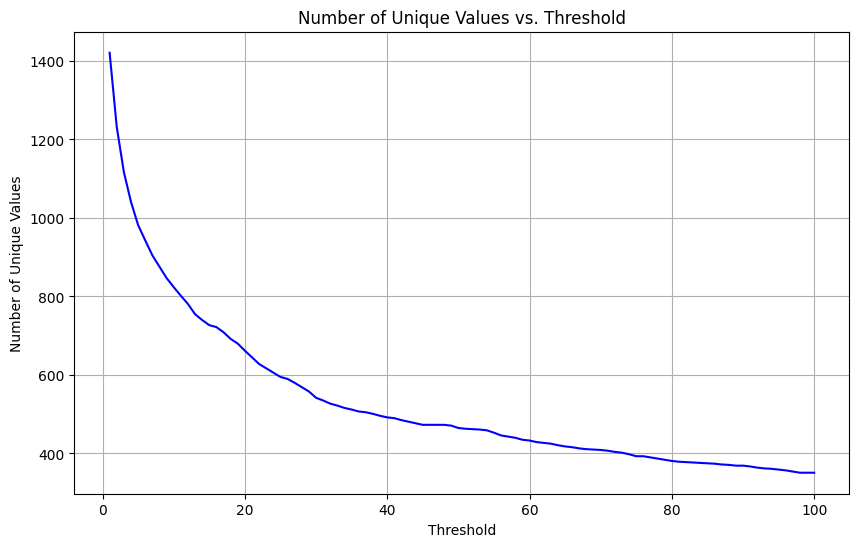

In [28]:
thresholds = range(1, 101)

# Calculate value counts once outside the loop
value_counts = df['division'].value_counts()

# Use vectorized operations within the loop
unique_values_counts = [
    len(df.loc[~df['division'].isin(value_counts[value_counts < threshold].index), 'division'].unique())
    for threshold in thresholds
]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, unique_values_counts, linestyle='-', color='b')
plt.title('Number of Unique Values vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Unique Values')
plt.grid(True)
plt.show()

In [29]:
# Identify less frequent values
threshold = 50  # Adjust as needed
value_counts = df['division'].value_counts()
rare_values = value_counts[value_counts < threshold].index

# Replace less frequent values with a common category
df['division'] = df['division'].replace(rare_values, 'Other')
df['division'] = df['division'].replace('', 'Other')
df['division'] = df['division'].replace('-', 'Other')

In [30]:
df.division.value_counts().get('Other', 0)

35006

In [31]:
df.division.unique()

array(['English Premier Division', 'Sky Bet Championship',
       'Scottish Premiership', 'Turkish Super League',
       'Russian Premier League', 'Ukrainian Premier League',
       'Croatian First League', '3F Superliga', 'Serbian SuperLeague',
       'Greek Super League 1', 'Czech First Division',
       'Sky Bet League One', 'Swedish Premier Division',
       'Russian First Division', 'Bulgarian First League',
       'Slovenian First League', 'Romanian First League',
       'Israeli Premier League', 'Hungarian Division I',
       'Sky Bet League Two', 'Norwegian Premier Division',
       'Turkish 1. League', 'PKO Bank Polski Ekstraklasa',
       'Scottish Championship', 'Cypriot First Division',
       'Norwegian First Division', 'Croatian Second League',
       'Kazakhstan Premier League', 'Other', 'Finnish Premier League',
       'Greek Super League 2', 'Swedish First Division Elite',
       'Ukrainian First League', 'Turkish 2. League White Group',
       '1. Division', 'Bosnian 

##### league ratings, country abbreviations and division abbreviations

In [32]:
divisions_abbreviations = {
    'English Premier Division': 'ENG1',
    'Sky Bet Championship': 'ENG2',
    'Scottish Premiership': 'SCO1',
    'Turkish Super League': 'TUR1',
    'Russian Premier League': 'RUS1',
    'Ukrainian Premier League': 'UKR1',
    'Croatian First League': 'CRO1',
    '3F Superliga': 'DEN1',
    'Serbian SuperLeague': 'SRB1',
    'Greek Super League 1': 'GRE1',
    'Czech First Division': 'CZE1',
    'Sky Bet League One': 'ENG3',
    'Swedish Premier Division': 'SWE1',
    'Russian First Division': 'RUS2',
    'Bulgarian First League': 'BUL1',
    'Slovenian First League': 'SVN1',
    'Romanian First League': 'ROU1',
    'Israeli Premier League': 'ISR1',
    'Hungarian Division I': 'HUN1',
    'Sky Bet League Two': 'ENG4',
    'Norwegian Premier Division': 'NOR1',
    'Turkish 1. League': 'TUR2',
    'PKO Bank Polski Ekstraklasa': 'POL1',
    'Scottish Championship': 'SCO2',
    'Cypriot First Division': 'CYP1',
    'Norwegian First Division': 'NOR2',
    'Croatian Second League': 'CRO2',
    'Kazakhstan Premier League': 'KAZ1',
    'Other': 'OTH1',
    'Finnish Premier League': 'FIN1',
    'Greek Super League 2': 'GRE2',
    'Swedish First Division Elite': 'SWE2',
    'Ukrainian First League': 'UKR2',
    'Turkish 2. League White Group': 'TUR3',
    '1. Division': 'BRA1',
    'Bosnian Premier League': 'BIH1',
    'Czech Third Division CFL A': 'CZE3',
    'Irish Premier Division': 'IRL1',
    'Ukrainian Second League - Group B': 'UKR3',
    'Finnish Second Division Group B': 'FIN2',
    'Serbian First League': 'SRB2',
    'Turkish 2. League Red Group': 'TUR4',
    'Maltese Premier League': 'MLT1',
    '2. Division': 'NOR3',
    'Slovak First Division': 'SVK1',
    'Polish First Division': 'POL2',
    'Hungarian Division II': 'HUN2',
    'Serbian Second League Belgrade': 'SRB3',
    'Russian Lower Division': 'RUS3',
    'Slovenian Second League': 'SVN2',
    'Romanian Third League Group 4': 'ROU3',
    'Vanarama National League': 'ENG5',
    'Belarusian Highest League': 'BLR1',
    'Czech Second Division': 'CZE2',
    'Ukrainian Second League - Group A': 'UKR4',
    'Irish First Division': 'IRL2',
    'Slovak Second Division': 'SVK2',
    'Russian Second Division - Group 1': 'RUS4',
    'Finnish First Division': 'FIN3',
    'Hungarian Division III - West': 'HUN3',
    'Norwegian Third Division Group 4': 'NOR4',
    'Armenian High League': 'ARM1',
    'Swedish First Division North': 'SWE3',
    'Hungarian Division III - Centre': 'HUN4',
    'Russian Second Division - Group 4': 'RUS5',
    'Russian Second Division - Group 3': 'RUS6',
    'Russian Second Division - Group 2': 'RUS7',
    'Norwegian Second Division Group 2': 'NOR5',
    'Hungarian Division III - East': 'HUN5',
    'Israeli National League': 'ISR2',
    'Serbian Zone League': 'SRB4',
    'Polish Second Division': 'POL3',
    'Icelandic Premier Division': 'ISL1',
    'Romanian Second League': 'ROU4',
    'Ukrainian Lower Division': 'UKR5',
    'Scottish League 1': 'SCO3',
    'Turkish 3. League Group 3': 'TUR5',
    'Vanarama National League South': 'ENG6',
    'Swedish Second Division West Götaland': 'SWE4',
    'Danske Bank Premiership': 'NIR1',
    'Croatian Third League North': 'CRO3',
    'Croatian Third League South': 'CRO4',
    'Romanian Third League Group 6': 'ROU5',
    'Swedish First Division South': 'SWE5',
    'Israeli A League South Division': 'ISR3',
    'Czech Third Division CFL B': 'CZE4',
    'Czech Third Division MSFL': 'CZE5',
    'Vanarama National League North': 'ENG7',
    'Finnish Lower Division': 'FIN4',
    'Turkish 3. League Group 1': 'TUR6',
    'Norwegian Third Division Group 3': 'NOR6',
    'Icelandic First Division': 'ISL2',
    'Romanian Third League Group 2': 'ROU6',
    'Romanian Third League Group 5': 'ROU7',
    'Croatian Third League East': 'CRO5',
    'Turkish 3. League Group 2': 'TUR7',
    'Czech Fourth Division D': 'CZE6',
    'Romanian Third League Group 3': 'ROU8',
    'Norwegian Third Division Group 1': 'NOR7',
    'Serbian Second League Vojvodina': 'SRB5',
    'Swedish Second Division South Svealand': 'SWE6',
    'Romanian Third League Group 7': 'ROU9',
    'Greek Football League South': 'GRE3',
    'Finnish Third Division': 'FIN5',
    'Czech Fourth Division A': 'CZE7',
    'Czech Lower Division': 'CZE8',
    'Czech Fourth Division F': 'CZE9',
    'Norwegian Second Division Group 1': 'NOR8',
    'Polish Third Division Group 1': 'POL4',
    'Finnish Second Division Group A': 'FIN6',
    'Croatian Third League Central': 'CRO6',
    'Norwegian Third Division Group 2': 'NOR9',
    'Finnish Second Division Group C': 'FIN7',
    'Israeli A League North Division': 'ISR4',
    'Turkish 3. League Group 4': 'TUR8',
    'Slovenian Third League East': 'SVN3',
    'Norwegian Third Division Group 6': 'NOR10',
    'Romanian Third League Group 10': 'ROU10',
    'Bulgarian Second League': 'BUL2',
    'Belarusian First League': 'BLR2',
    'Hungarian Lower Division': 'HUN6',
    'Polish Fourth Division': 'POL5',
    'Romanian Third League Group 8': 'ROU11',
    'Greek Football League North': 'GRE4',
    'Romanian Third League Group 9': 'ROU12',
    'Swedish Second Division North Götaland': 'SWE7',
    'Israeli B League South A Division': 'ISR5',
    'JD Cymru Premier': 'WAL1',
    'Swedish Second Division East Götaland': 'SWE8',
    'Romanian Lower League': 'ROU13',
    'Romanian Third League Group 1': 'ROU14',
    'Czech Fourth Division C': 'CZE10',
    'Swedish Third Division Middle Götaland': 'SWE9',
    'Swedish Second Division Norrland': 'SWE10',
    'Polish Third Division Group 4': 'POL6',
    'Scottish League 2': 'SCO4',
    'Serbian Second League East': 'SRB6',
    'Czech Fourth Division B': 'CZE11',
    'Icelandic U19 Division B': 'ISL3',
    'Greek Regional Division Group 6': 'GRE5',
    'JD Cymru North': 'WAL2',
    'Slovenian Third League West': 'SVN4',
    'Serbian Second League West': 'SRB7',
    'Polish Third Division Group 3': 'POL7',
    'Irish Leinster Senior League Premier Division': 'IRL3',
    'Scottish Lowland League': 'SCO5',
    'Swedish Second Division North Svealand': 'SWE11',
    'Icelandic Second Division': 'ISL4',
    'Polish Third Division Group 2': 'POL8',
    'Slovenian Lower League': 'SVN5',
    "Bulgarian 'A' Regional Groups": 'BUL3',
    'Israeli B League South B Division': 'ISR6',
    'Bluefin Sport Championship': 'NIR2',
    'Croatian Third League West': 'CRO7',
    'Icelandic U19 Division A': 'ISL5',
    'Greek Regional Division Group 10': 'GRE6',
    'West of Scotland Premier Division': 'SCO6',
    'Greek Regional Division Group 9': 'GRE7',
    'Greek Regional Division Group 4': 'GRE8',
    'Icelandic Third Division': 'ISL6',
    'Greek Regional Division Group 1': 'GRE9',
    'Greek Regional Division Group 5': 'GRE10',
    'Greek Regional Division Group 2': 'GRE11',
    'Greek Regional Division Group 7': 'GRE12',
    'Highland Football League': 'SCO7',
    'Greek Regional Division Group 3': 'GRE13',
    'Greek Regional Division Group 8': 'GRE14',
    'Swedish Third Division West Svealand': 'SWE12',
    'Slovak Lower Division': 'SVK3',
    'East of Scotland Premier Division': 'SCO8',
    'Northern Amateur Football League Premier Division': 'NIR3',
    'Belarusian Second League': 'BLR4',
    'Bulgarian Third League North-East': 'BUL4',
    'Israeli B League North A Division': 'ISR7',
    'Bulgarian Third League North-West': 'BUL5',
    'Bulgarian Third League South-East': 'BUL6',
    'JD Cymru South': 'WAL3',
    'North Caledonian League': 'SCO9',
    'Swedish Third Division Northeast Götaland': 'SWE13',
    'Israeli B League North B Division': 'ISR8',
    'Bulgarian Third League South-West': 'BUL7',
    'Swedish Third Division South Svealand': 'SWE14',
    'Bluefin Sport Premier Intermediate League': 'NIR4',
    'Swedish Third Division North Svealand': 'SWE15',
    'Norwegian Lower Division': 'NOR11',
    'Icelandic Lower Division': 'ISL7',
    'Northern Irish Ballymena Premier Division': 'NIR5',
    'Croatian Regional League - Split (17)': 'CRO8',
    'Greek Amateur First Division - Athens Group A': 'GRE15',
    'Ligue 1 Uber Eats': 'FRA1',
    'Bundesliga': 'GER1',
    'Spanish First Division': 'ESP1',
    'Italian Serie A': 'ITA1',
    'Eredivisie': 'NED1',
    'Portuguese Premier League': 'POR1',
    'Spanish Second Division': 'ESP2',
    'Belgian Pro League A': 'BEL1',
    'Swiss Super League': 'SUI1',
    'Belgian Pro League B': 'BEL2',
    'Austrian Premier Division': 'AUT1',
    'Swiss Challenge League': 'SUI2',
    'Italian Serie B': 'ITA2',
    'Spanish Third Division Group 6': 'ESP3',
    'Spanish Second Division B2': 'ESP2',
    'Bundesliga 2': 'GER2',
    'Spanish Second Division B3': 'ESP2',
    'Ligue 2 BKT': 'FRA2',
    '3. Liga': 'GER3',
    'French National 2 - C': 'FRA4',
    'German Regional Division Southwest': 'GER4',
    'Spanish Second Division B4': 'ESP2',
    'Italian Serie C/C': 'ITA3',
    'German Regional Division West': 'GER4',
    'Spanish Second Division B5': 'ESP2',
    'Austrian First Division': 'AUT1',
    'Keuken Kampioen Divisie': 'NED2',
    'Portuguese Second League': 'POR2',
    'French National 3 - Paris Ile de France': 'FRA5',
    'German Regional Division Northeast': 'GER4',
    'French National 3 - Corse - Méditerranée': 'FRA5',
    'Italian Serie C/B': 'ITA3',
    'French National 3 - Bourgogne Franche Comté': 'FRA5',
    'Spanish Second Division B1': 'ESP2',
    'Spanish Third Division Group 4': 'ESP3',
    'Portugal Championship - Group G': 'POR4',
    'Spanish Third Division Group 7': 'ESP3',
    'French National 3 - Auvergne Rhône Alpes': 'FRA5',
    'French National': 'FRA3',
    'French National 3 - Nouvelle Aquitaine': 'FRA5',
    'Portugal Championship - Group A': 'POR4',
    'Italian Serie C/A': 'ITA3',
    'Portugal Championship - Group C': 'POR4',
    'Portugal Championship - Group B': 'POR4',
    'Spanish Third Division Group 8': 'ESP3',
    'French National 2 - B': 'FRA4',
    'French National 3 - Hauts de France': 'FRA5',
    'Spanish Third Division Group 2': 'ESP3',
    'Austrian Regional League Salzburg': 'AUT4',
    'German Regional Division North': 'GER4',
    'Luxembourg National Division': 'LUX1',
    'Spanish Third Division Group 10': 'ESP3',
    'Belgian First Amateur Division': 'BEL3',
    'French National 2 - A': 'FRA4',
    'French National 3 - Occitanie': 'FRA5',
    'Swiss Promotion League': 'SUI2',
    'French National 3 - Bretagne': 'FRA5',
    'Spanish Third Division Group 1': 'ESP3',
    'French National 2 - D': 'FRA4',
    'French National 3 - Grand Est': 'FRA5',
    'Austrian Regional League East': 'AUT3',
    'Spanish Third Division Group 17': 'ESP3',
    'Portugal Championship - Group H': 'POR4',
    'Austrian Regional League Central': 'AUT3',
    'Spanish Third Division Group 13': 'ESP3',
    'Swiss First League Group 3': 'SUI3',
    'Spanish Third Division Group 9': 'ESP3',
    'Spanish Third Division Group 18': 'ESP3',
    'Portugal Championship - Group E': 'POR4',
    'German Div. Bavaria South': 'GER5',
    'Italian Serie D Grp. C': 'ITA4',
    'Italian Serie D Grp. B': 'ITA4',
    'Belgian Third Amateur Division A (Wal)': 'BEL4',
    'Portugal Championship - Group F': 'POR4',
    'Spanish Third Division Group 11': 'ESP3',
    'Austrian Lower Austria League': 'AUT4',
    'German Regional Division Bavaria': 'GER4',
    'Austrian Regional League Tyrol': 'AUT4',
    'German Lower Division': 'GER5',
    'Portuguese Algarve First Division': 'POR5',
    'Swiss First League Group 1': 'SUI3',
    'Swiss First League Group 2': 'SUI3',
    'Spanish Third Division Group 16': 'ESP3',
    'Spanish Third Division Group 5': 'ESP3',
    'Belgian Second Amateur Division C': 'BEL4',
    'French Regional 1 - Auvergne Rhône Alpes - Group C': 'FRA6',
    'Swiss Second League Interregio Gr 1': 'SUI4',
    'Austrian Tyrol League': 'AUT4',
    'Portugal Championship - Group D': 'POR4',
    'Dutch Tweede Divisie': 'NED3',
    'French National 3 - Normandie': 'FRA5',
    'French National 3 - Centre Val de Loire': 'FRA5',
    'German Div. Baden-Württemberg': 'GER5',
    'Spanish Third Division Group 12': 'ESP3',
    'Italian Serie D Grp. E': 'ITA4',
    'French Regional Divisions': 'FRA6',
    'Spanish Third Division Group 3': 'ESP3',
    'Belgian Second Amateur Division B': 'BEL4',
    'Italian Serie D Grp. H': 'ITA4',
    'Italian Serie D Grp. A': 'ITA4',
    'Belgian Third Amateur Division B (Fla)': 'BEL4',
    'Italian Serie D Grp. G': 'ITA4',
    'Italian Serie D Grp. F': 'ITA4',
    'Swiss Second League Interregio Gr 4': 'SUI4',
    'Italian Serie D Grp. I': 'ITA4',
    'Spanish Third Division Group 14': 'ESP3',
    'Italian Serie D Grp. D': 'ITA4',
    'French National 3 - Pays de la Loire': 'FRA5',
    'Austrian Vienna League': 'AUT5',
    'Austrian Eliteleague Vorarlberg': 'AUT5',
    'Swiss Second League Interregio Gr 2': 'SUI4',
    'Portuguese Lower Regional Divisions': 'POR5',
    'Antwerp Provincial Division': 'BEL5',
    'Belgian Second Amateur Division A': 'BEL4',
    'Swiss Second League Interregio Gr 6': 'SUI4',
    'Portuguese Porto First Division Serie 1': 'POR5',
    'Limburg Provincial Division': 'BEL5',
    'Swiss Second League Interregio Gr 5': 'SUI4',
    'West-Flanders Provincial Division': 'BEL5',
    'Swiss Under 18 Elite': 'SUI6',
    'Belgian Third Amateur Division A (Fla)': 'BEL4',
    'Swiss Second League Interregio Gr 3': 'SUI4',
    'Belgian Third Amateur Division B (Wal)': 'BEL4',
    'Swiss Under 18 (17)': 'SUI6',
    'Swiss Lower Division': 'SUI7',
    'East-Flanders Provincial Division': 'BEL5',
    'Portuguese Lisbon First Division': 'POR5',
    'Portuguese Setúbal First Division': 'POR5',
    'Portuguese Porto First Division Serie 2': 'POR5',
    'Dutch Derde Divisie Zaterdag': 'NED4',
    'Brazilian National First Division': 'BRA1',
    'Argentine Premier Division': 'ARG1',
    'Colombian First Division': 'COL1',
    'Brazilian National Second Division': 'BRA2',
    'Argentine Second Division': 'ARG2',
    'Ecuadorian LigaPro Serie A': 'ECU1',
    'Chilean First Division': 'CHI1',
    'Uruguayan First Division': 'URU1',
    'Argentine Torneo Federal A': 'ARG3',
    'Paraguay First Division Primera División': 'PAR1',
    'Chilean First Division B': 'CHI2',
    'Argentine Metropolitan B Zone': 'ARG4',
    'Argentine Metropolitan C Zone': 'ARG4',
    'Brazilian National Fourth Division': 'BRA4',
    'Argentine Torneo Federal C': 'ARG4',
    'Argentine Torneo Federal B': 'ARG4',
    'Brazilian National Third Division': 'BRA3',
    'Brazilian National Lower Division': 'BRA5',
    'Bolivian Premier Division': 'BOL1',
    'Argentine Metropolitan D Zone': 'ARG4',
    'Peruvian First Division': 'PER1',
    'Colombian Second Division': 'COL2',
    'Chilean Second Division': 'CHI3',
    'Uruguayan Second Professional Division': 'URU2',
    'Peruvian Second Division': 'PER2',
    'Peruvian Copa Peru': 'PER3',
    'Chilean Third Division A': 'CHI4',
    'Chilean South Group Third Division B': 'CHI4',
    'Uruguayan First Amateur Division': 'URU3',
    'Uruguayan Rocha Department': 'URU4',
    'Chilean North Group Third Division B': 'CHI4',
    'Chilean Centre Group Third Division B': 'CHI4',
    'Chinese Super League': 'CHN1',
    'Saudi Professional League': 'KSA1',
    'UAE Professional League': 'UAE1',
    'Qatari Stars League': 'QAT1',
    'Chinese National First Division': 'CHN2',
    'Chinese National Second Division Northern Group': 'CHN3',
    'Hana 1Q K LEAGUE 2': 'KOR2',
    'Iraqi Premier League': 'IRQ1',
    'A-League': 'AUS1',
    'Saudi First Division': 'KSA2',
    'Hana 1Q K LEAGUE 1': 'KOR1',
    'Uzbekistan Superleague': 'UZB1',
    'Kuwaiti Premier League': 'KUW1',
    'Syrian Premier League': 'SYR1',
    'Thai League': 'THA1',
    'Iranian Professional League': 'IRN1',
    'National Premier Leagues - Queensland': 'AUS2',
    'Football Queensland Premier League': 'AUS3',
    'National Premier Leagues - NSW': 'AUS4',
    'National Premier Leagues - Victoria': 'AUS5',
    'Singaporean Premier League': 'SGP1',
    'Malaysian Super League': 'MAS1',
    'National Premier Leagues - Western Australia': 'AUS6',
    'Hong Kong Premier League': 'HKG1',
    'National Premier Leagues - Northern NSW': 'AUS7',
    'Korean K3 League': 'KOR3',
    'Bahraini Premier League': 'BHR1',
    'Malaysian Premier League': 'MAS2',
    'Indian National Football League': 'IND1',
    'Indonesian League One': 'IDN1',
    'National Premier Leagues - Victoria 2': 'AUS8',
    'National Premier Leagues - NSW 2': 'AUS9',
    'Indonesian League Two': 'IDN2',
    'National Premier Leagues - South Australia': 'AUS10',
    'National Premier Leagues - Victoria 3': 'AUS11',
    'North Korean Premier Football League': 'PRK1',
    'Singaporean Football League Division Two': 'SGP2',
    'National Premier Leagues - ACT': 'AUS12',
    'Bruneian Super League': 'BRN1',
    'Indian Lower Division': 'IND2',
    'Malaysian Division Three League Group A': 'MAS3',
    'South Australia - State League 2': 'AUS13',
    'Singaporean Football League Division One': 'SGP3',
    'South Australia - State League 1': 'AUS14',
    'Malaysian Division Three League Group B': 'MAS3',
    'Western Australia State League Division 1': 'AUS15',
    'Malaysian Lower Division': 'MAS4',
    'Victorian State League 1 South-East': 'AUS16',
    'Western Australia State League Division 2': 'AUS17',
    'Victorian State League 2 North-West': 'AUS18',
    'Brisbane Premier League': 'AUS19',
    'National Premier Leagues - ACT 2': 'AUS20',
    'NNSW Northern League One': 'AUS21',
    'Victorian State League 1 North-West': 'AUS22',
    'Bruneian Premier League': 'BRN1',
    'Bruneian Lower Division': 'BRN2',
    'Victorian State League 2 South-East': 'AUS23',
    'National Premier Leagues - Tasmania': 'AUS24',
    'Major League Soccer': 'USA1',
    'Egyptian Premier League': 'EGY1',
    'Mexican First Division': 'MEX1',
    'Tunisian League 1': 'TUN1',
    'USSL Championship Western Conference': 'USA2',
    'Moroccan Premier Division': 'MAR1',
    'Lower Leagues': 'UNK1',
    'USSL Championship Eastern Conference': 'USA2',
    'United States Soccer Leagues Division One': 'USA3',
    'Mexican Expansion League': 'MEX2',
    'South African Premier Soccer League': 'RSA1',
    'Canadian Premier League': 'CAN1',
    'National Independent Soccer Association': 'USA3',
    'USSL D2 - Great Lakes Division': 'USA4',
    'MLS Next - Mid-America Division': 'USA3',
    'Angolan Championship': 'ANG1',
    'USSL D2 - Mountain Division': 'USA4',
    'South African National First Division': 'RSA2',
    'USSL D2 - Southeast Division': 'USA4',
    'Mexican Premier Division Serie A Group II': 'MEX3',
    'Solomon Islands S-League': 'SOL1',
    'Papua New Guinean National Soccer League': 'PNG1',
    'Fijian Premier League': 'FIJ1',
    'Première Ligue de soccer du Québec': 'CAN3',
    'SAFA Gauteng Division 2': 'RSA3',
    'USSL D2 - Mid Atlantic Division': 'USA4',
    'Championnat Super Ligue': 'NCL1',
    'Vanuatuan Port Vila Premier Division': 'VAN1',
    'Tahitian First Division': 'TAH1',
    'SAFA KwaZulu Natal Division 2': 'RSA3',
    'SAFA Western Cape Division 2': 'RSA3',
    'Fijian Lower Division': 'FIJ2',
    'New Zealand Premiership': 'NZL1',
    'Mexican Premier Division Serie A Group I': 'MEX3',
    'Bermudan Premier Division': 'BER1',
    'New Zealand Central Premier League': 'NZL2',
    'New Zealand NRFL Premier Division': 'NZL2',
    'New Zealand NRFL Division One': 'NZL3',
    'New Zealand Mainland Premier League': 'NZL3',
    'Samoan Premier League': 'SAM1',
    'Cook Islands Round Cup': 'COK1',
    'MLS Next - Southeast Division': 'USA3',
    'American Samoan Senior League Division One': 'ASA1',
    'League1 Ontario': 'CAN3',
    'MLS Next - Northwest Division': 'USA4',
    'New Zealand NRFL Division Two': 'NZL4',
    'USSL D2 - Southwest Division': 'USA4',
    'USSL D2 - Northeast Division': 'USA4',
    'USSL D2 - Heartland Division': 'USA4',
    'USSL D2 - Mid South Division': 'USA4',
    'USSL D2 - Northwest Division': 'USA4',
    'USSL D2 - South Atlantic Division': 'USA4',
    'MLS Next - Northeast Division': 'USA3',
    'MLS Next - Atlantic Division': 'USA3',
    'MLS Next - Frontier Division': 'USA3',
    'MLS Next - Southwest Division': 'USA3'}
    


In [33]:
full_league_ratings = [
    ('England', 93.8), ('Spain', 90.8), ('Germany', 90.3), ('Italy', 89.5), ('Brazil', 86.2), ('France', 85.1),
    ('Portugal', 84.4), ('Argentina', 80.8), ('Turkey', 80.8), ('Greece', 80.7), ('Mexico', 80.0), ('Russia', 79.8),
    ('Czech Republic', 78.4), ('Netherlands', 78.4), ('Colombia', 78.1), ('Switzerland', 77.4), ('Spain', 77.3),
    ('Germany', 77.1), ('Denmark', 77.1), ('Paraguay', 76.9), ('Belgium', 76.8), ('Croatia', 76.8), ('Ecuador', 76.6),
    ('Brazil', 75.5), ('England', 75.4), ('Austria', 75.3), ('Italy', 74.8), ('Sweden', 74.2), ('Israel', 73.9),
    ('Cyprus', 73.7), ('Poland', 73.5), ('Romania', 73.4), ('Uruguay', 72.7), ('Mexico', 72.2), ('Norway', 72.1),
    ('France', 71.7), ('South Korea', 71.6), ('Portugal', 71.6), ('Chile', 71.4), ('Argentina', 71.4),
    ('Slovakia', 71.0), ('Iran', 71.0), ('Serbia', 70.9), ('Brazil', 70.9), ('Costa Rica', 70.8), ('Hungary', 70.8),
    ('Turkey', 70.2), ('Bosnia and Herzegovina', 70.1), ('Germany', 70.0), ('Bulgaria', 69.8), ('Georgia', 69.8),
    ('Ukraine', 69.5), ('Colombia', 69.4), ('Peru', 69.4), ('USA', 69.3), ('Australia', 69.1), ('Spain', 68.7),
    ('Belarus', 68.6), ('Japan', 68.5), ('Scotland', 68.4), ('China PR', 67.5), ('Argentina', 67.5), ('Brazil', 67.2),
    ('United Arab Emirates', 67.2), ('Azerbaijan', 66.8), ('Saudi Arabia', 66.7), ('Venezuela', 66.6), ('England', 66.5),
    ('Ecuador', 66.3), ('Italy', 66.3), ('Paraguay', 66.2), ('Australia', 66.1), ('Switzerland', 66.0), ('Greece', 65.9),
    ('Guatemala', 65.5), ('France', 65.5), ('Bolivia', 65.4), ('Kazakhstan', 65.2), ('Slovenia', 65.0), ('Albania', 64.9),
    ('Iceland', 64.8), ('Russia', 64.8), ('Morocco', 64.8), ('Macedonia', 64.7), ('Poland', 64.7), ('Mexico', 64.7),
    ('Chile', 64.4), ('Portugal', 64.2), ('Finland', 64.2), ('Denmark', 63.6), ('Honduras', 63.5), ('Uruguay', 63.3),
    ('Algeria', 63.2), ('Czech Republic', 63.2), ('Tunisia', 62.9), ('Israel', 62.7), ('Turkey', 62.6), ('Qatar', 62.6),
    ('Panama', 62.5), ('Republic of Ireland', 62.4), ('Argentina', 62.3), ('Germany', 62.1), ('Spain', 61.4),
    ('Romania', 61.2), ('South Korea', 61.1), ('Montenegro', 61.1), ('Iran', 60.8), ('Peru', 60.7),
    ('Netherlands', 60.6), ('Sweden', 60.5), ('Greece', 60.3), ('Croatia', 60.0), ('Moldova', 59.7),
    ('Northern Ireland', 59.6), ('Egypt', 59.5), ('Nigeria', 59.5), ('Argentina', 59.3), ('Iraq', 59.2), ('Belgium', 59.1),
    ('Uzbekistan', 59.0), ('Serbia', 59.0), ('Hungary', 58.9), ('South Africa', 58.9), ('England', 58.8),
    ('Argentina', 58.8), ('Italy', 58.7), ('Costa Rica', 58.6), ('USA', 58.4), ('Lithuania', 58.4), ('Kuwait', 58.3),
    ('France', 58.0), ('Norway', 57.9), ('Venezuela', 57.4), ('Chile', 57.2), ('El Salvador', 57.2), ('Bahrain', 57.1),
    ('Slovakia', 57.1), ('Thailand', 56.8), ('Japan', 56.6), ("Ivory Coast", 56.5), ('Ghana', 56.4), ('Poland', 56.1),
    ('Guatemala', 55.9), ('Austria', 55.9), ('Bosnia and Herzegovina', 55.8), ('Georgia', 55.5), ('Cyprus', 55.1),
    ('Israel', 55.1), ('Morocco', 55.1), ('Latvia', 54.9), ('Panama', 54.9), ('Kosovo', 54.9), ('Senegal', 54.9),
    ('Jordan', 54.6), ('Oman', 54.4), ('Armenia', 54.3), ('Uruguay', 54.2), ('Algeria', 54.1), ('Turkey', 53.8),
    ('Jamaica', 53.8), ('Greece', 53.7), ('Syria', 53.5), ('Wales', 53.5), ('Denmark', 53.5), ('Albania', 53.1),
    ('Cameroon', 52.7), ('Serbia', 52.6), ('South Korea', 52.6), ('Congo DR', 52.6), ('China PR', 52.4),
    ('Zambia', 52.4), ('Bulgaria', 52.4), ('Angola', 52.3), ('Faroe Islands', 52.2), ('Scotland', 52.0), ('Chile', 52.0),
    ('Tunisia', 52.0), ('Switzerland', 51.9), ('France', 51.7), ('Spain', 51.7), ('Congo', 51.7), ('Montenegro', 51.6),
    ('Qatar', 51.3), ('Czech Republic', 51.1), ('Sweden', 51.0), ('Saudi Arabia', 50.9), ('Gabon', 50.8), ('England', 50.8),
    ('Togo', 50.6), ('Kenya', 50.6), ('Macedonia', 50.3), ('Gambia', 50.3), ('Russia', 50.1),
    ('United Arab Emirates', 50.1), ('Croatia', 50.0), ('Kazakhstan', 49.9), ('Belarus', 49.8), ('Mali', 49.6),
    ('Libya', 49.6), ('Finland', 49.1), ('Slovenia', 48.7), ('Burkina Faso', 48.5), ('Slovakia', 48.5),
    ('Romania', 48.4), ('Ethiopia', 48.4), ('Azerbaijan', 48.2), ('Malta', 48.2), ('Nicaragua', 48.2),
    ('Belgium', 48.2), ('Uzbekistan', 48.1), ('Ukraine', 48.0), ('Lebanon', 47.8), ('Tanzania', 47.8),
    ('Republic of Ireland', 47.8), ('Netherlands', 47.8), ('South Africa', 47.7), ('Iceland', 47.2),
    ('Rwanda', 47.2), ('Zimbabwe', 47.1), ('Poland', 47.1), ('Luxembourg', 47.1), ('Uganda', 46.9), ('Sudan', 46.8),
    ('Guinea', 46.6), ('Japan', 46.0), ('Bolivia', 45.9), ('Mozambique', 45.9), ('USA', 45.9), ('Israel', 45.2),
    ('Hungary', 45.1), ('Palestine', 44.8), ('Swaziland', 44.8), ('Norway', 44.4), ('Japan', 44.0), ('Gibraltar', 43.9),
    ('Cyprus', 43.8), ('Scotland', 43.7), ('India', 43.5), ('Thailand', 43.4), ('Georgia', 43.3), ('New Zealand', 43.1),
    ('Albania', 42.9), ('Sierra Leone', 42.4), ('Haiti', 42.2), ('Estonia', 42.0), ('Switzerland', 41.8),
    ('Bulgaria', 41.5), ('Bahrain', 41.3), ('Trinidad and Tobago', 41.1), ('Vietnam', 40.8)
]


In [34]:
# Sort the list alphabetically by country names
sorted_league_ratings = sorted(full_league_ratings, key=lambda x: x[0])

# Display the sorted list
for country, rating in sorted_league_ratings:
    print(f'{country}: {rating}')

Albania: 64.9
Albania: 53.1
Albania: 42.9
Algeria: 63.2
Algeria: 54.1
Angola: 52.3
Argentina: 80.8
Argentina: 71.4
Argentina: 67.5
Argentina: 62.3
Argentina: 59.3
Argentina: 58.8
Armenia: 54.3
Australia: 69.1
Australia: 66.1
Austria: 75.3
Austria: 55.9
Azerbaijan: 66.8
Azerbaijan: 48.2
Bahrain: 57.1
Bahrain: 41.3
Belarus: 68.6
Belarus: 49.8
Belgium: 76.8
Belgium: 59.1
Belgium: 48.2
Bolivia: 65.4
Bolivia: 45.9
Bosnia and Herzegovina: 70.1
Bosnia and Herzegovina: 55.8
Brazil: 86.2
Brazil: 75.5
Brazil: 70.9
Brazil: 67.2
Bulgaria: 69.8
Bulgaria: 52.4
Bulgaria: 41.5
Burkina Faso: 48.5
Cameroon: 52.7
Chile: 71.4
Chile: 64.4
Chile: 57.2
Chile: 52.0
China PR: 67.5
China PR: 52.4
Colombia: 78.1
Colombia: 69.4
Congo: 51.7
Congo DR: 52.6
Costa Rica: 70.8
Costa Rica: 58.6
Croatia: 76.8
Croatia: 60.0
Croatia: 50.0
Cyprus: 73.7
Cyprus: 55.1
Cyprus: 43.8
Czech Republic: 78.4
Czech Republic: 63.2
Czech Republic: 51.1
Denmark: 77.1
Denmark: 63.6
Denmark: 53.5
Ecuador: 76.6
Ecuador: 66.3
Egypt: 59.5
El 

In [35]:
# Abbreviations for countries
country_abbreviations = {
    'Germany': 'GER', 'Paraguay': 'PRY', 'Angola': 'AGO', 'Denmark': 'DNK',
    'Norway': 'NOR', 'Switzerland': 'CHE', 'Scotland': 'SCO', 'Wales': 'WAL',
    'Saudi Arabia': 'SAU', 'Nigeria': 'NGA', 'Vanuatu': 'VUT', 'Iran': 'IRN',
    'Congo DR': 'COD', 'Venezuela': 'VEN', 'Mali': 'MLI', 'Italy': 'ITA',
    'Finland': 'FIN', 'Peru': 'PER', 'Ivory Coast': 'CIV', 'Puerto Rico': 'PRI',
    'Portugal': 'PRT', 'Ghana': 'GHA', 'Romania': 'ROU', 'Costa Rica': 'CRC',
    'Colombia': 'COL', 'Turkey': 'TUR', 'Australia': 'AUS', 'Austria': 'AUT',
    'Netherlands': 'NLD', 'Cyprus': 'CYP', 'Greece': 'GRC', 'England': 'ENG',
    'Sweden': 'SWE', 'El Salvador': 'SLV', 'Turkmenistan': 'TKM', 'Cameroon': 'CMR',
    'Algeria': 'DZA', 'Thailand': 'THA', 'India': 'IND', 'France': 'FRA',
    'South Africa': 'ZAF', 'Estonia': 'EST', 'United Arab Emirates': 'ARE',
    'Macedonia': 'MKD', 'Bulgaria': 'BGR', 'Niger': 'NER', 'Kazakhstan': 'KAZ',
    'Lebanon': 'LBN', 'Qatar': 'QAT', 'Sudan': 'SDN', 'Jordan': 'JOR', 'Libya': 'LBY',
    'Egypt': 'EGY', 'Kuwait': 'KWT', 'Iraq': 'IRQ', 'Russia': 'RUS', 'Uruguay': 'URY',
    'Japan': 'JPN', 'Argentina': 'ARG', 'Panama': 'PAN', 'Spain': 'ESP',
    'Guyana': 'GUY', 'Slovenia': 'SVN', 'Bolivia': 'BOL', 'Mexico': 'MEX',
    'Brazil': 'BRA', 'Uzbekistan': 'UZB', 'Guatemala': 'GTM', 'Armenia': 'ARM',
    'Azerbaijan': 'AZE', 'Haiti': 'HTI', 'Northern Ireland': 'NIR', 'Indonesia': 'IDN',
    'Singapore': 'SGP', 'Jamaica': 'JAM', 'Nicaragua': 'NIC', 'Tunisia': 'TUN',
    'New Caledonia': 'NCL', 'Morocco': 'MAR', 'Trinidad and Tobago': 'TTO',
    'Republic of Ireland': 'IRL', 'USA': 'USA', 'Honduras': 'HND', 'Ecuador': 'ECU',
    'New Zealand': 'NZL', 'Chile': 'CHL', 'Tanzania': 'TZA', 'Fiji': 'FJI',
    'Hungary': 'HUN', 'Lithuania': 'LTU', 'Czech Republic': 'CZE', 'Zimbabwe': 'ZWE',
    'Belarus': 'BLR', 'China PR': 'CHN', 'Israel': 'ISR', 'Poland': 'POL',
    'Montenegro': 'MNE', 'Latvia': 'LVA', 'Vietnam': 'VNM', 'Bosnia and Herzegovina': 'BIH',
    'Serbia': 'SRB', 'Zambia': 'ZMB', 'South Korea': 'KOR', 'Syria': 'SYR',
    'Belgium': 'BEL', 'Canada': 'CAN', 'Moldova': 'MDA', 'Georgia': 'GEO',
    'Ukraine': 'UKR', 'Croatia': 'HRV', 'Luxembourg': 'LUX', 'Congo': 'COG',
    'Senegal': 'SEN', 'Tahiti': 'TAH', 'Slovakia': 'SVK', 'Hong Kong': 'HKG',
    'Papua New Guinea': 'PNG', 'Mozambique': 'MOZ', 'Iceland': 'ISL',
    'Tajikistan': 'TJK', 'Botswana': 'BWA', 'Solomon Islands': 'SLB',
    'Guinea': 'GIN', 'Malaysia': 'MYS', 'Togo': 'TGO', 'Albania': 'ALB',
    'Samoa': 'WSM', 'Gibraltar': 'GIB', 'Burundi': 'BDI', 'Cook Islands': 'COK',
    'Ethiopia': 'ETH', 'Kenya': 'KEN', 'Uganda': 'UGA', 'Belize': 'BLZ', 'Bahrain': 'BHR', 'Kosovo': 'KOS',
    'Oman': 'OMA', 'Faroe Islands': 'FRO', 'Gabon': 'GAB', 'Gambia': 'GAM', 'Burkina Faso': 'BFA', 'Malta': 'MLT',
    'Rwanda': 'RWA', 'Palestine': 'PLE', 'Swaziland': 'SWZ', 'Sierra Leone': 'SLE'
}

In [36]:
sorted_abbreviations = dict(sorted(country_abbreviations.items()))

In [37]:
sorted_abbreviations

{'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahrain': 'BHR',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Chile': 'CHL',
 'China PR': 'CHN',
 'Colombia': 'COL',
 'Congo': 'COG',
 'Congo DR': 'COD',
 'Cook Islands': 'COK',
 'Costa Rica': 'CRC',
 'Croatia': 'HRV',
 'Cyprus': 'CYP',
 'Czech Republic': 'CZE',
 'Denmark': 'DNK',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 'SLV',
 'England': 'ENG',
 'Estonia': 'EST',
 'Ethiopia': 'ETH',
 'Faroe Islands': 'FRO',
 'Fiji': 'FJI',
 'Finland': 'FIN',
 'France': 'FRA',
 'Gabon': 'GAB',
 'Gambia': 'GAM',
 'Georgia': 'GEO',
 'Germany': 'GER',
 'Ghana': 'GHA',
 'Gibraltar': 'GIB',
 'Greece': 'GRC',
 'Guatemala': 'GTM',
 'Guinea

#### adding rating for every league

In [38]:
# Count appearances for each country
appearances = {}
league_ratings = {}

# Iterate through the original list
for country, rating in full_league_ratings:
    # If the country appears for the first time, add it to the appearances dictionary
    if country not in appearances:
        appearances[country] = 1
    else:
        # Increment the appearance count and update the country code
        appearances[country] += 1
    country_code = country_abbreviations.get(country, country)
    league_ratings[f'{country_code}{appearances[country]}'] = rating   

In [39]:
# check
league_ratings

{'ENG1': 93.8,
 'ESP1': 90.8,
 'GER1': 90.3,
 'ITA1': 89.5,
 'BRA1': 86.2,
 'FRA1': 85.1,
 'PRT1': 84.4,
 'ARG1': 80.8,
 'TUR1': 80.8,
 'GRC1': 80.7,
 'MEX1': 80.0,
 'RUS1': 79.8,
 'CZE1': 78.4,
 'NLD1': 78.4,
 'COL1': 78.1,
 'CHE1': 77.4,
 'ESP2': 77.3,
 'GER2': 77.1,
 'DNK1': 77.1,
 'PRY1': 76.9,
 'BEL1': 76.8,
 'HRV1': 76.8,
 'ECU1': 76.6,
 'BRA2': 75.5,
 'ENG2': 75.4,
 'AUT1': 75.3,
 'ITA2': 74.8,
 'SWE1': 74.2,
 'ISR1': 73.9,
 'CYP1': 73.7,
 'POL1': 73.5,
 'ROU1': 73.4,
 'URY1': 72.7,
 'MEX2': 72.2,
 'NOR1': 72.1,
 'FRA2': 71.7,
 'KOR1': 71.6,
 'PRT2': 71.6,
 'CHL1': 71.4,
 'ARG2': 71.4,
 'SVK1': 71.0,
 'IRN1': 71.0,
 'SRB1': 70.9,
 'BRA3': 70.9,
 'CRC1': 70.8,
 'HUN1': 70.8,
 'TUR2': 70.2,
 'BIH1': 70.1,
 'GER3': 70.0,
 'BGR1': 69.8,
 'GEO1': 69.8,
 'UKR1': 69.5,
 'COL2': 69.4,
 'PER1': 69.4,
 'USA1': 69.3,
 'AUS1': 69.1,
 'ESP3': 68.7,
 'BLR1': 68.6,
 'JPN1': 68.5,
 'SCO1': 68.4,
 'CHN1': 67.5,
 'ARG3': 67.5,
 'BRA4': 67.2,
 'ARE1': 67.2,
 'AZE1': 66.8,
 'SAU1': 66.7,
 'VEN1': 6

In [40]:
min_div = min(league_ratings.values())

division_rating = {}

# adding 
for key, value in divisions_abbreviations.items():
    division_rating[key] = league_ratings.get(value, min_div)

In [41]:
# check
division_rating

{'English Premier Division': 93.8,
 'Sky Bet Championship': 75.4,
 'Scottish Premiership': 68.4,
 'Turkish Super League': 80.8,
 'Russian Premier League': 79.8,
 'Ukrainian Premier League': 69.5,
 'Croatian First League': 40.8,
 '3F Superliga': 40.8,
 'Serbian SuperLeague': 70.9,
 'Greek Super League 1': 40.8,
 'Czech First Division': 78.4,
 'Sky Bet League One': 66.5,
 'Swedish Premier Division': 74.2,
 'Russian First Division': 64.8,
 'Bulgarian First League': 40.8,
 'Slovenian First League': 65.0,
 'Romanian First League': 73.4,
 'Israeli Premier League': 73.9,
 'Hungarian Division I': 70.8,
 'Sky Bet League Two': 58.8,
 'Norwegian Premier Division': 72.1,
 'Turkish 1. League': 70.2,
 'PKO Bank Polski Ekstraklasa': 73.5,
 'Scottish Championship': 52.0,
 'Cypriot First Division': 73.7,
 'Norwegian First Division': 57.9,
 'Croatian Second League': 40.8,
 'Kazakhstan Premier League': 65.2,
 'Other': 40.8,
 'Finnish Premier League': 64.2,
 'Greek Super League 2': 40.8,
 'Swedish First D

In [42]:
# making dataframe out of division_rating
division_df = pd.DataFrame(list(division_rating.items()), columns=['division', 'rating'])

In [43]:
# peek
division_df.sample(5)

,division,rating
122,Romanian Third League Group 8,40.8
377,Bahraini Premier League,57.1
434,USSL D2 - Mid Atlantic Division,40.8
337,Bolivian Premier Division,65.4
117,Romanian Third League Group 10,40.8


In [44]:
# merging to main dataframe
df = pd.merge(df, division_df, on='division', how='left')
df = df.drop(columns=['division']).rename(columns={'rating': 'division_rating'})
df['division_rating'] = df['division_rating'].fillna(min_div)
df.sample(5)

,name,club,nat,position,dob,age,preferred foot,right foot,left foot,height,...,fin,1v1,tro,centerback,fullback,goalkeeper,midfielder,striker,winger,division_rating
100225,Frédéric Farin,Tienen,BEL,M/AM (C),1/1/1989 (31 years old),31.0,Right,Very Strong,Weak,179.0,...,9.0,2.0,1.0,0,0,0,1,0,0,48.2
117992,Agustín Russo,Arsenal (Sarandí),ARG,D (C),20/10/1999 (20 years old),20.0,Right,Very Strong,Weak,180.0,...,4.0,1.0,1.0,1,0,0,0,0,0,80.8
139827,Régis,,BRA,DM,29/9/1986 (33 years old),33.0,Left,Reasonable,Very Strong,167.0,...,10.0,2.0,1.0,0,0,0,1,0,0,40.8
14382,Ciaran McKenna,Partick Thistle,SCO,D (C),25/3/1998 (22 years old),22.0,Right,Very Strong,Reasonable,194.0,...,6.0,1.0,3.0,1,0,0,0,0,0,43.7
132485,Carlos Oyarzún,Provincial Ranco,CHI,GK,9/12/1998 (21 years old),21.0,Right Only,Very Strong,Weak,185.0,...,3.0,7.0,14.0,0,0,1,0,0,0,40.8


### quantify nationality

In [45]:
# Read the Excel file into a DataFrame
fifa_df = pd.read_excel('../raw_data/Fifa_index.xlsx')

In [46]:
# Rename 'Column1' to 'Code'
fifa_df.rename(columns={'Column1': 'nat'}, inplace=True)

# Drop 'Previous Points' and '+/-' columns
fifa_df.drop(['RK','Team','Previous Points', '+/-'], axis=1, inplace=True)

# peek
fifa_df.head()

,nat,Total Points
0,ARG,1861.29
1,FRA,1853.11
2,BRA,1812.20
3,ENG,1807.88
4,BEL,1793.71


In [47]:
min_nat = min(fifa_df["Total Points"])

In [48]:
# Merge the two DataFrames on the common column 'Nationality' and 'Code'

df = pd.merge(df, fifa_df, on = 'nat', how='left')

df = df.rename(columns={'Total Points': 'nat_rating'})

df['nat_rating'] = df['nat_rating'].fillna(min_nat)

In [49]:
# check
df.sample(5)

,name,club,nat,position,dob,age,preferred foot,right foot,left foot,height,...,1v1,tro,centerback,fullback,goalkeeper,midfielder,striker,winger,division_rating,nat_rating
84137,Toni Conejo,Vélez C.F.,ESP,AM (RC),12/3/1991 (29 years old),29.0,Right,Very Strong,Weak,177.0,...,2.0,2.0,0,0,0,1,0,0,68.7,1725.97
145638,Li Ming,Guangzhou,CHN,"D (C), ST (C)",21/1/1999 (21 years old),21.0,Right Only,Very Strong,Weak,183.0,...,3.0,2.0,1,0,0,0,0,0,67.5,1296.99
143399,Hu Yanqiang,Beijing,CHN,M/AM (R),20/3/1993 (27 years old),27.0,Right,Very Strong,Weak,178.0,...,1.0,3.0,0,0,0,0,0,1,67.5,1296.99
16014,Linus Tagesson,Djurgårdens IF,SWE,D/WB (R),11/2/2002 (18 years old),18.0,Right Only,Very Strong,Weak,180.0,...,1.0,1.0,0,1,0,0,0,0,74.2,1545.76
47750,Niall Fielding,Institute,NIR,ST (C),16/3/2002 (18 years old),18.0,Right Only,Very Strong,Weak,179.0,...,2.0,3.0,0,0,0,0,1,0,40.8,1325.06


### quantify club

In [50]:
df.club.nunique()

11626

In [51]:
# reducing number of values

# Identify less frequent values
threshold = 15  # Adjust as needed
value_counts = df['club'].value_counts()
rare_values = value_counts[value_counts < threshold].index

# Replace less frequent values with a common category
df['club'] = df['club'].replace(rare_values, 'Other')
df['club'] = df['club'].replace('', 'Other')

In [52]:
df.club.nunique()

3740

In [53]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174324 entries, 0 to 174323
Data columns (total 68 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             174324 non-null  object 
 1   club             174324 non-null  object 
 2   nat              174324 non-null  object 
 3   position         174324 non-null  object 
 4   dob              174324 non-null  object 
 5   age              174324 non-null  float32
 6   preferred foot   174324 non-null  object 
 7   right foot       174324 non-null  object 
 8   left foot        174324 non-null  object 
 9   height           174324 non-null  float32
 10  weight           174324 non-null  float32
 11  wage             127480 non-null  float32
 12  last trans. fee  58178 non-null   float32
 13  value            174324 non-null  float32
 14  agg              174324 non-null  float32
 15  jum              174324 non-null  float32
 16  pun              174324 non-null  floa

In [54]:
# Read the Excel file into a DataFrame
club_df = pd.read_excel('../raw_data/FichierRegression.xlsx')

In [55]:
club_df = club_df[['Club','Club_point']]
club_df.drop_duplicates(inplace=True)

# changing special characters e.g.: Kylian MbappÃ© --> Kylian Mbappé
club_df['Club'] = club_df['Club'].astype(str).apply(lambda x: x.encode('latin-1').decode('utf-8'))
club_df["Club"] = club_df["Club"].apply(str.strip)
club_df.rename(columns={'Club': 'club'}, inplace=True)

In [56]:
# peek
club_df.sample(5)

,club,Club_point
1270,Al-Wahda (UAE),1452.0
17152,Sandnes Ulf,1255.0
1802,Hamburger SV,1539.0
610,Shakhtar,1714.0
605,Sporting,1797.0


In [57]:
min_club = min(club_df['Club_point'])

In [58]:
df = pd.merge(df, club_df, on = 'club', how='left')

df = df.rename(columns={'Club_point': 'club_rating'})

df['club_rating'] = df['club_rating'].fillna(min_club)

In [59]:
df.head()

,name,club,nat,position,dob,age,preferred foot,right foot,left foot,height,...,tro,centerback,fullback,goalkeeper,midfielder,striker,winger,division_rating,nat_rating,club_rating
0,Kevin De Bruyne,Man City,BEL,"M (RLC), AM (C)",28/6/1991 (29 years old),29.0,Either,Very Strong,Strong,181.0,...,3.0,0,0,0,1,0,0,93.8,1793.71,2013.0
1,Harry Kane,Tottenham,ENG,"AM (C), ST (C)",28/7/1993 (27 years old),26.0,Either,Very Strong,Very Strong,188.0,...,3.0,0,0,0,0,1,0,93.8,1807.88,1837.0
2,Mohamed Salah,Liverpool,EGY,"AM (RL), ST (C)",15/6/1992 (28 years old),28.0,Left,Weak,Very Strong,175.0,...,2.0,0,0,0,0,0,1,93.8,1511.95,2042.0
3,Sadio Mané,Liverpool,SEN,"AM (RL), ST (C)",10/4/1992 (28 years old),28.0,Right,Very Strong,Reasonable,175.0,...,4.0,0,0,0,0,0,1,93.8,1600.82,2042.0
4,Son Heung-Min,Tottenham,KOR,"M/AM (RL), ST (C)",8/7/1992 (28 years old),28.0,Either,Very Strong,Very Strong,183.0,...,1.0,0,0,0,0,0,1,93.8,1540.35,1837.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174324 entries, 0 to 174323
Data columns (total 69 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             174324 non-null  object 
 1   club             174324 non-null  object 
 2   nat              174324 non-null  object 
 3   position         174324 non-null  object 
 4   dob              174324 non-null  object 
 5   age              174324 non-null  float32
 6   preferred foot   174324 non-null  object 
 7   right foot       174324 non-null  object 
 8   left foot        174324 non-null  object 
 9   height           174324 non-null  float32
 10  weight           174324 non-null  float32
 11  wage             127480 non-null  float32
 12  last trans. fee  58178 non-null   float32
 13  value            174324 non-null  float32
 14  agg              174324 non-null  float32
 15  jum              174324 non-null  float32
 16  pun              174324 non-null  floa

### onehotencode foot

In [61]:
df["preferred foot"].unique()

array(['Either', 'Left', 'Right', 'Right Only', 'Left Only'], dtype=object)

In [62]:
df['preferred foot'] = df['preferred foot'].replace("Right Only", "Right")
df['preferred foot'] = df['preferred foot'].replace("Left Only", "Left")

In [63]:
conditions = [
    (df["left foot"] == "Very Strong") & (df["preferred foot"] == "Either"),
    (df["right foot"] == "Very Strong") & (df["preferred foot"] == "Either")
]

choices = ["Either_left", "Either_right"]

df["preferred foot"] = np.select(conditions, choices, default=df["preferred foot"])

In [64]:
df = pd.get_dummies(df, columns=["preferred foot"], prefix="", prefix_sep="", dtype=int)

df.drop(columns = ['left foot', 'right foot'], inplace=True)

In [65]:
df.head()

,name,club,nat,position,dob,age,height,weight,wage,last trans. fee,...,midfielder,striker,winger,division_rating,nat_rating,club_rating,Either_left,Either_right,Left,Right
0,Kevin De Bruyne,Man City,BEL,"M (RLC), AM (C)",28/6/1991 (29 years old),29.0,181.0,68.0,1091000.0,60000000.0,...,1,0,0,93.8,1793.71,2013.0,0,1,0,0
1,Harry Kane,Tottenham,ENG,"AM (C), ST (C)",28/7/1993 (27 years old),26.0,188.0,86.0,948000.0,NaN,...,0,1,0,93.8,1807.88,1837.0,1,0,0,0
2,Mohamed Salah,Liverpool,EGY,"AM (RL), ST (C)",15/6/1992 (28 years old),28.0,175.0,72.0,948000.0,37500000.0,...,0,0,1,93.8,1511.95,2042.0,0,0,1,0
3,Sadio Mané,Liverpool,SEN,"AM (RL), ST (C)",10/4/1992 (28 years old),28.0,175.0,69.0,854000.0,40000000.0,...,0,0,1,93.8,1600.82,2042.0,0,0,0,1
4,Son Heung-Min,Tottenham,KOR,"M/AM (RL), ST (C)",8/7/1992 (28 years old),28.0,183.0,77.0,450000.0,24000000.0,...,0,0,1,93.8,1540.35,1837.0,1,0,0,0


#  final cleaning

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174324 entries, 0 to 174323
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             174324 non-null  object 
 1   club             174324 non-null  object 
 2   nat              174324 non-null  object 
 3   position         174324 non-null  object 
 4   dob              174324 non-null  object 
 5   age              174324 non-null  float32
 6   height           174324 non-null  float32
 7   weight           174324 non-null  float32
 8   wage             127480 non-null  float32
 9   last trans. fee  58178 non-null   float32
 10  value            174324 non-null  float32
 11  agg              174324 non-null  float32
 12  jum              174324 non-null  float32
 13  pun              174324 non-null  float32
 14  vis              174324 non-null  float32
 15  l th             174324 non-null  float32
 16  lon              174324 non-null  floa

In [67]:
# Fill NaN values in 'wage' with the minimum value
min_wage = df['wage'].min()
df['wage'].fillna(min_wage, inplace=True)

# Fill NaN values in 'last trans. fee' with 0
df['last trans. fee'].fillna(0, inplace=True)

In [68]:
# let second_minimum value become minimum value
min_value = df['value'].min()
second_min_value = df['value'][df['value'] != min_value].min()
df['value'].replace(min_value, second_min_value, inplace=True)

In [69]:
# cleaning column names

df.rename(str.lower, axis='columns', inplace = True)
df.rename(str.strip, axis='columns', inplace = True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174324 entries, 0 to 174323
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             174324 non-null  object 
 1   club             174324 non-null  object 
 2   nat              174324 non-null  object 
 3   position         174324 non-null  object 
 4   dob              174324 non-null  object 
 5   age              174324 non-null  float32
 6   height           174324 non-null  float32
 7   weight           174324 non-null  float32
 8   wage             174324 non-null  float32
 9   last trans. fee  174324 non-null  float32
 10  value            174324 non-null  float32
 11  agg              174324 non-null  float32
 12  jum              174324 non-null  float32
 13  pun              174324 non-null  float32
 14  vis              174324 non-null  float32
 15  l th             174324 non-null  float32
 16  lon              174324 non-null  floa

# export

In [71]:
df.to_csv('../raw_data/clean_data.csv', index=False)